In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,AA,ACB,ADBE,AIG,AMGN,AMRK,APOG,ATV,AVGO,AXP,...,T,TLRD,TMUS,TWO,TXN,UNIT,USB,V,VNCE,WGO
aacr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aatd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'AA': [('oplinger', 32),
  ('unidentified', 32),
  ('analyst', 32),
  ('william', 31),
  ('million', 27),
  ('weve', 23),
  ('aluminum', 21),
  ('company', 17),
  ('metric', 17),
  ('right', 15),
  ('demand', 15),
  ('cash', 14),
  ('business', 14),
  ('world', 14),
  ('china', 14),
  ('years', 14),
  ('year', 13),
  ('just', 13),
  ('tons', 13),
  ('sure', 12),
  ('going', 12),
  ('bauxite', 11),
  ('time', 11),
  ('thats', 11),
  ('able', 10),
  ('little', 10),
  ('bit', 10),
  ('basis', 10),
  ('refining', 10),
  ('global', 9)],
 'ACB': [('cannabis', 75),
  ('just', 53),
  ('market', 53),
  ('cam', 51),
  ('think', 51),
  ('quarter', 47),
  ('going', 38),
  ('aurora', 37),
  ('glen', 37),
  ('thats', 36),
  ('million', 33),
  ('battley', 33),
  ('right', 32),
  ('medical', 31),
  ('weve', 31),
  ('terry', 31),
  ('products', 28),
  ('revenue', 27),
  ('production', 25),
  ('bit', 25),
  ('growth', 25),
  ('question', 24),
  ('yes', 24),
  ('business', 24),
  ('like', 24),
  ('canad

In [4]:
# Print the top 15 words said by each comedian
for ticker, top_words in top_dict.items():
    print(ticker)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

AA
oplinger, unidentified, analyst, william, million, weve, aluminum, company, metric, right, demand, cash, business, world
---
ACB
cannabis, just, market, cam, think, quarter, going, aurora, glen, thats, million, battley, right, medical
---
ADBE
adobe, experience, business, growth, digital, revenue, just, cloud, think, new, creative, really, platform, million
---
AIG
brian, jay, duperreault, gelb, think, just, right, aig, thats, company, time, risk, okay, reinsurance
---
AMGN
think, market, weve, continue, biosimilars, growth, david, company, products, yes, graham, area, product, data
---
AMRK
million, year, fiscal, gold, quarter, sales, increase, silver, greg, business, inventory, increased, new, lower
---
APOG
quarter, glass, year, million, segment, architectural, weve, margin, puishys, fiscal, growth, projects, joseph, kind
---
ATV
million, quarter, operations, acorn, second, half, net, income, increase, products, sales, business, ecommerce, digital
---
AVGO
year, business, billion

In [30]:
import spacy
import pandas as pd
import itertools as it
import os
import codecs



nlp = spacy.load("en_core_web_sm")

#


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [33]:
import spacy
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [29]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for ticker in data.columns:
    top = [word for (word, count) in top_dict[ticker]]
    for t in top:
        words.append(t)
        
words

['oplinger',
 'unidentified',
 'analyst',
 'william',
 'million',
 'weve',
 'aluminum',
 'company',
 'metric',
 'right',
 'demand',
 'cash',
 'business',
 'world',
 'china',
 'years',
 'year',
 'just',
 'tons',
 'sure',
 'going',
 'bauxite',
 'time',
 'thats',
 'able',
 'little',
 'bit',
 'basis',
 'refining',
 'global',
 'cannabis',
 'just',
 'market',
 'cam',
 'think',
 'quarter',
 'going',
 'aurora',
 'glen',
 'thats',
 'million',
 'battley',
 'right',
 'medical',
 'weve',
 'terry',
 'products',
 'revenue',
 'production',
 'bit',
 'growth',
 'question',
 'yes',
 'business',
 'like',
 'canada',
 'product',
 'new',
 'good',
 'continue',
 'adobe',
 'experience',
 'business',
 'growth',
 'digital',
 'revenue',
 'just',
 'cloud',
 'think',
 'new',
 'creative',
 'really',
 'platform',
 'million',
 'quarter',
 'customer',
 'question',
 'product',
 'customers',
 'enterprise',
 'weve',
 'yearoveryear',
 'market',
 'thats',
 'strong',
 'like',
 'billion',
 'year',
 'document',
 'bookings',
 '

In [7]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('year', 65),
 ('just', 61),
 ('think', 61),
 ('million', 58),
 ('quarter', 53),
 ('thats', 52),
 ('business', 51),
 ('going', 48),
 ('weve', 45),
 ('like', 41),
 ('growth', 39),
 ('thank', 38),
 ('really', 35),
 ('new', 34),
 ('sales', 34),
 ('question', 31),
 ('good', 31),
 ('market', 29),
 ('second', 24),
 ('right', 23),
 ('time', 22),
 ('continue', 22),
 ('fiscal', 22),
 ('revenue', 21),
 ('company', 20),
 ('customers', 20),
 ('years', 19),
 ('yes', 17),
 ('lot', 17),
 ('okay', 16),
 ('look', 16),
 ('kind', 16),
 ('cash', 15),
 ('net', 15),
 ('things', 15),
 ('know', 14),
 ('results', 14),
 ('bit', 12),
 ('margin', 12),
 ('dont', 12),
 ('stores', 12),
 ('compared', 12),
 ('little', 11),
 ('product', 11),
 ('expect', 11),
 ('financial', 11),
 ('products', 10),
 ('customer', 10),
 ('want', 10),
 ('say', 10),
 ('got', 9),
 ('data', 9),
 ('increase', 9),
 ('operating', 9),
 ('way', 9),
 ('months', 9),
 ('great', 8),
 ('theres', 8),
 ('half', 8),
 ('retail', 8),
 ('gross', 8),
 ('capit

In [9]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 2]
add_stop_words

['year',
 'just',
 'think',
 'million',
 'quarter',
 'thats',
 'business',
 'going',
 'weve',
 'like',
 'growth',
 'thank',
 'really',
 'new',
 'sales',
 'question',
 'good',
 'market',
 'second',
 'right',
 'time',
 'continue',
 'fiscal',
 'revenue',
 'company',
 'customers',
 'years',
 'yes',
 'lot',
 'okay',
 'look',
 'kind',
 'cash',
 'net',
 'things',
 'know',
 'results',
 'bit',
 'margin',
 'dont',
 'stores',
 'compared',
 'little',
 'product',
 'expect',
 'financial',
 'products',
 'customer',
 'want',
 'say',
 'got',
 'data',
 'increase',
 'operating',
 'way',
 'months',
 'great',
 'theres',
 'half',
 'retail',
 'gross',
 'capital',
 'number',
 'statements',
 'operator',
 'today',
 'store',
 'value',
 'youre',
 'period',
 'adjusted',
 'slide',
 'digital',
 'strong',
 'billion',
 'terms',
 'believe',
 'patients',
 'expenses',
 'brands',
 'study',
 'cost',
 'make',
 'network',
 'michael',
 'im',
 'analyst',
 'basis',
 'inventory',
 'increased',
 'project',
 'services',
 'thanks',

In [11]:

# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcripts)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [12]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

ValueError: num must be 1 <= num <= 15, not 16

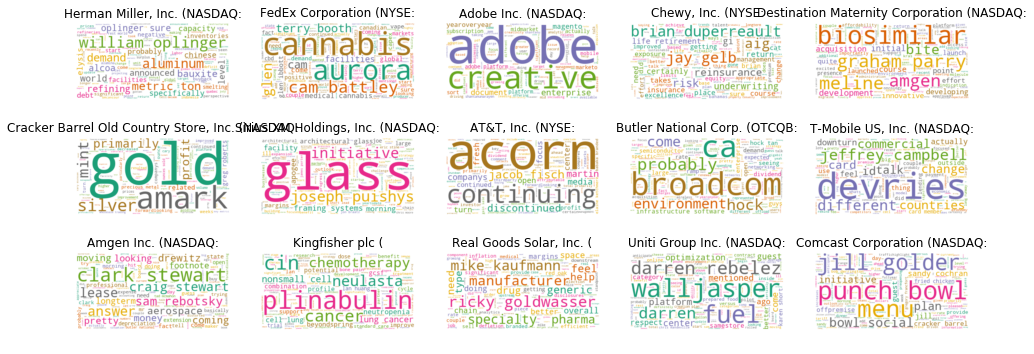

In [20]:
# Reset the output dimensions
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/Users/ryanmedhaug/downloads/finally.csv')

plt.rcParams['figure.figsize'] = [16, 6]

full_names = df['name']

# Create subplots for each comedian
for index, ticker in enumerate(data.columns):
    wc.generate(data_clean.transcripts[ticker])
    
    plt.subplot(3, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [16]:

# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for ticker in data.columns:
    uniques = data[ticker].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['ticker', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,ticker,unique_words
21,"CenturyLink, Inc. (NYSE:",362
53,Innate Pharma SA (,410
25,InMed Pharmaceuticals Inc. (,426
47,"RF Industries, Ltd. (NASDAQ:",486
17,"General Mills, Inc. (NYSE:",501
7,"AT&T, Inc. (NYSE:",534
19,"Darden Restaurants, Inc. (NYSE:",535
36,"Acorn International, Inc. (NYSE:",599
33,"Champions Oncology, Inc. (NASDAQ:",602
58,The Lovesac Company (NASDAQ:,613
